This is start genetic distribution: 5071 0 5029
This is start population distribution (male/female): 10000 100
This is iteration 0
start population for this round:  10100
old population after die out:  5052
end population for this round:  13362
Distribution for current iteration: 4486 4231 4645
Population for current iteration (male/female): 9208 4154
'============'================'=============='============='============='
This is iteration 1
start population for this round:  13362
old population after die out:  4110
end population for this round:  12537
Distribution for current iteration: 3031 6339 3167
Population for current iteration (male/female): 6266 6271
'============'================'=============='============='============='
This is iteration 2
start population for this round:  12537
old population after die out:  4177
end population for this round:  12864
Distribution for current iteration: 3179 6374 3311
Population for current iteration (male/female): 6403 6461
'=========

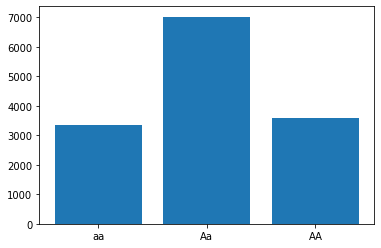

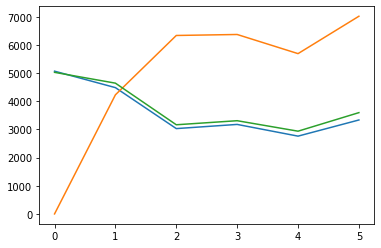

verification for random pick:  [0, 1, 2, 2, 2, 0, 1, 2, 0]


In [21]:
import random
import matplotlib.pyplot as plt

malePop=[]
femalePop=[]

malePopSize=10000
femalePopSize=100

miniDieOut=1
maxDieOut=2

iterationNumber=5

def initialize(malePopSize, femalePopSize):
    maleP=[]
    femaleP=[]
    
    
    geneChoice=['a','A']
    #male generate
    for i in range(malePopSize):
        individual=[]
        g=random.choice(geneChoice)
        individual.append(g)
        #g=random.choice(geneChoice)##comment out if the initial is same allele
        individual.append(g) #append twice
        individual.append(random.randint(miniDieOut,maxDieOut))# this will be the third index of each individual, and it is the life time of this individual
        
        maleP.append(individual)
    #female generate    
    for i in range(femalePopSize):
        individual=[]
        g=random.choice(geneChoice)
        individual.append(g)
        #g=random.choice(geneChoice)##comment out if the initial is same allele
        individual.append(g) #append twice
        individual.append(random.randint(miniDieOut,maxDieOut))# this will be the third index of each individual, and it is the life time of this individual
        
        femaleP.append(individual)
    return maleP,femaleP

def crossover(malePop, femalePop, crossoverTime=1000):
    crossoverMale=random.choices(malePop,k=crossoverTime)
    crossoverFemale=random.choices(femalePop,k=crossoverTime)
    
    malenewGeneration=[]
    femalenewGeneration=[]
    
    for i in range(crossoverTime):
        newIndividual=[]
        
        #choice gene from male
        indexChoice=random.choice([0,1])
        newIndividual.append(crossoverMale[i][indexChoice])
        
        #choice gene from female
        indexChoice=random.choice([0,1])
        newIndividual.append(crossoverFemale[i][indexChoice])
        
        newIndividual.append(random.randint(miniDieOut,maxDieOut))
        
        if(random.choice([0,1]) == 0):
            malenewGeneration.append(newIndividual)
        else:
            femalenewGeneration.append(newIndividual)
    return malenewGeneration,femalenewGeneration

def dieOut(malePop, femalePop):  
    i=0
    while i <len(malePop):
        malePop[i][2]-=1
        
        if malePop[i][2]<=0:  
            malePop.remove(malePop[i])
            continue
            
        i+=1
        
    i=0
    while i <len(femalePop):
        femalePop[i][2]-=1
        
        if femalePop[i][2]<=0:  
            femalePop.remove(femalePop[i])
            continue
            
        i+=1
    
    print("old population after die out: ",len(malePop)+len(femalePop))
    return malePop,femalePop



def checkDistribution(malePop, femalePop):
    aa=0
    Aa=0
    AA=0
    
    for individual in malePop:
        if individual[0]=='a' and individual[1]=='a':
            aa+=1
        elif individual[0]=='a' and individual[1]=='A':
            Aa+=1
        elif individual[0]=='A' and individual[1]=='a':   
            Aa+=1
        else:
            AA+=1
    for individual in femalePop:
        if individual[0]=='a' and individual[1]=='a':
            aa+=1
        elif individual[0]=='a' and individual[1]=='A':
            Aa+=1
        elif individual[0]=='A' and individual[1]=='a':   
            Aa+=1
        else:
            AA+=1
            
    return aa,Aa,AA



aaRecord=[]
AaRecord=[]
AARecord=[]

malePop,femalePop=initialize(malePopSize,femalePopSize)

aa,Aa,AA=checkDistribution(malePop, femalePop)
aaRecord.append(aa)
AaRecord.append(Aa)
AARecord.append(AA)

print("This is start genetic distribution:",aa,Aa,AA)
print("This is start population distribution (male/female):",len(malePop),len(femalePop))

for iteration in range(iterationNumber):
    print("This is iteration",iteration)
    print("start population for this round: ",len(malePop)+len(femalePop))
    
    
    currTotal=len(malePop)+len(femalePop)
    newMalePop,newFemalePop=crossover(malePop,femalePop,random.randint(int(currTotal*0.5),currTotal)) #we want the crossover rate between 0.8 to 1 percent of total populations
    
    malePop,femalePop=dieOut(malePop,femalePop)
    
    malePop.extend(newMalePop)
    femalePop.extend(newFemalePop)
#     malePop=newMalePop
#     femalePop=newFemalePop
    print("end population for this round: ",len(malePop)+len(femalePop))
    
    aa,Aa,AA=checkDistribution(malePop, femalePop)
    aaRecord.append(aa)
    AaRecord.append(Aa)
    AARecord.append(AA)
    print("Distribution for current iteration:",aa,Aa,AA)
    print("Population for current iteration (male/female):",len(malePop),len(femalePop))
    print("'============'================'=============='============='============='")
    
aa,Aa,AA=checkDistribution(malePop, femalePop)

print("Final Distribution after",iterationNumber,"iterations: ",aa,Aa,AA)
print("Final male and female population: ",len(malePop),len(femalePop))

plt.figure(1)
plt.bar(['aa','Aa','AA'],[aa,Aa,AA])
plt.figure(2)
plt.plot(aaRecord)
plt.plot(AaRecord)
plt.plot(AARecord)
plt.show()

print("verification for random pick: ", random.choices([0,1,2],k=9))#to verify if there is a replacement